In [1]:
#Imports
import random
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Define the range for each feature (a1,b1), (a2,b2), (a3,b3), (a4,b4), (a5,b5)
ranges = []
for i in range(5):
  a = random.randint(-100, 100)
  b = random.randint(a+1, 101)
  ranges.append((a, b))

# Randomly choose 2 features as important_features
important_features = sorted(random.sample(list(range(5)), 2)) #these are feature indices
ai, bi = ranges[important_features[0]]
aj, bj = ranges[important_features[1]]
ci, cj = np.mean([ai, bi]), np.mean([aj, bj])
print(f"Range of all 5 features:{ranges}")
print(f"Index of randomly selected important features: {important_features[0]} and {important_features[1]}")
print(f"Range and midpoint of important feature 1:{(ai, bi), ci}")
print(f"Range and midpoint of important feature 2:{(aj, bj), cj}")

Range of all 5 features:[(77, 83), (25, 42), (29, 40), (-34, 60), (36, 84)]
Index of randomly selected important features: 0 and 1
Range and midpoint of important feature 1:((77, 83), 80.0)
Range and midpoint of important feature 2:((25, 42), 33.5)


In [3]:
# Generate 1000 datapoints

n = 1000
dataset = []

for i in range(n):
  x = [np.random.uniform(r[0], r[1]) for r in ranges]
  xi, xj = x[important_features[0]], x[important_features[1]]
  
  if xi > ci and xj > cj:
    y = np.random.choice([0, 1], p=[0.2, 0.8])
  elif xi < ci and xj < cj:
    y = np.random.choice([0, 1], p=[0.8, 0.2])
  else:
    y = np.random.choice([0, 1], p=[0.5, 0.5])
    
  dataset.append(x+[y])

# Convert data into a DataFrame
feature_names = ['x1', 'x2', 'x3', 'x4', 'x5']
df = pd.DataFrame(dataset, columns=feature_names + ['y'])
print(f"Number of datapoints in the dataset: {len(df)}")

Number of datapoints in the dataset: 1000


In [4]:
#Inspecting Dataset
df.head()

,x1,x2,x3,x4,x5,y
0,82.642758,33.115137,36.253812,-4.632790,38.763188,1
1,81.672421,30.039090,34.016832,20.984456,64.212945,0
2,78.778306,31.676624,34.684953,3.813224,55.418209,1
3,80.375681,41.652708,32.249399,6.863171,45.471602,0
4,82.430122,30.976082,37.908300,-12.733406,73.468561,1


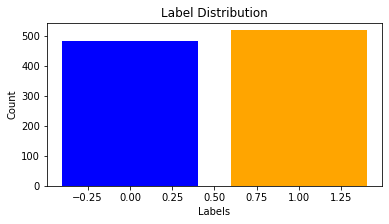

In [5]:
# Plot the label distribution
unique, counts = np.unique(df['y'], return_counts=True)
plt.figure(figsize=(6,3))
plt.bar(unique, counts, color=["blue" if i==0 else "orange" for i in unique])
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.show()

In [6]:
# Divide the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(df[feature_names], df['y'], test_size=0.2)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(train_data, train_target)

#Predict on Test Set
test_pred = clf.predict(test_data)

# Report test accuracy
print(f"Test accuracy: {metrics.accuracy_score(test_target, test_pred)}")

Test accuracy: 0.525


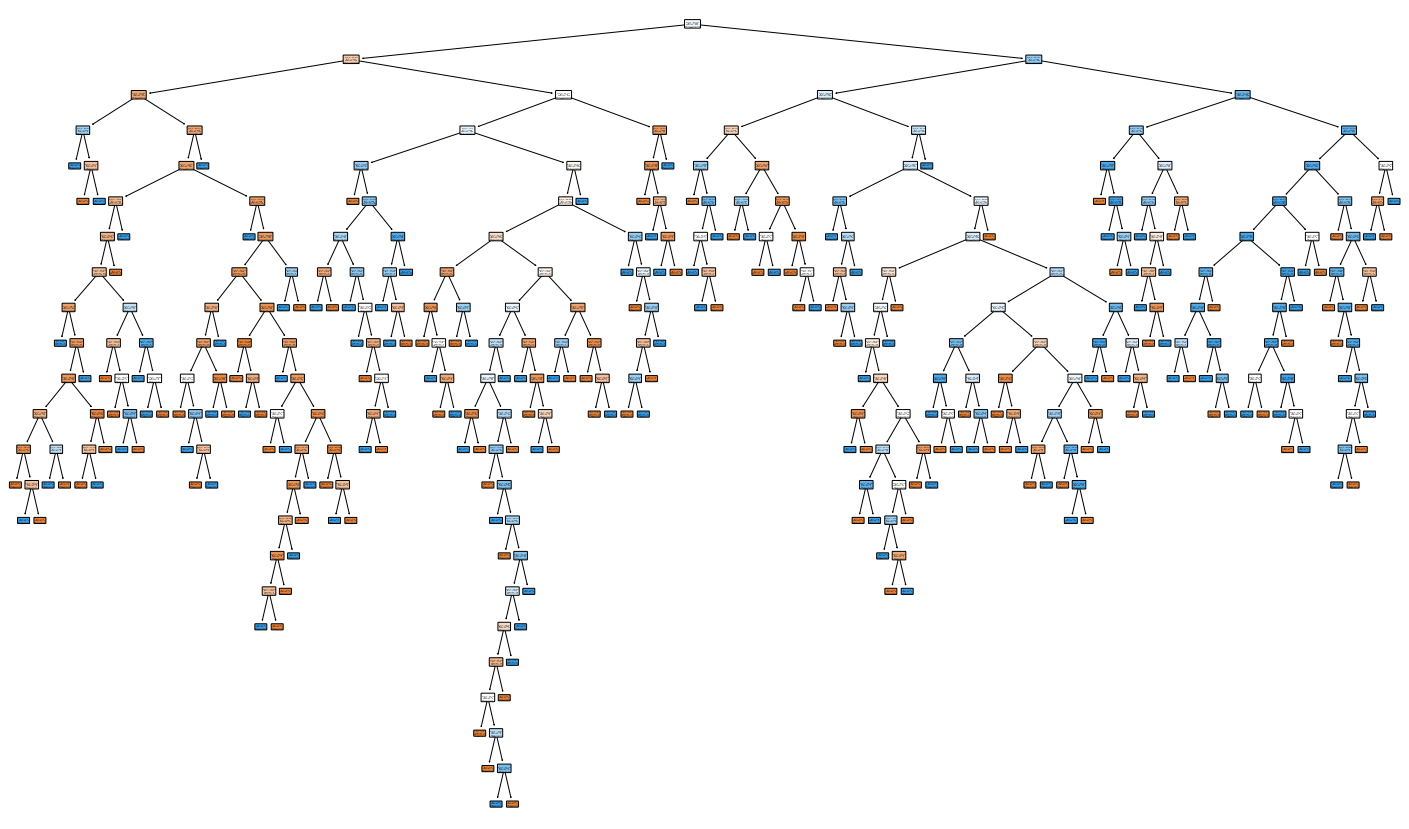

In [7]:
# Visualize the decision tree
plt.figure(figsize=(25,15))
plot_tree(clf, filled=True, rounded=True, class_names=["0", "1"])
plt.show()

## **Q: Has it been able to identify the “important” features?**

In [10]:
#Feature Importance
ftr_imps = clf.feature_importances_

print(f"Feature Importance of All Features: {ftr_imps}")
print(f"Feature Importance of Important Feature 1: {ftr_imps[important_features[0]]}")
print(f"Feature Importance of Important Feature 2: {ftr_imps[important_features[1]]}")

Feature Importance of All Features: [0.30354389 0.27549768 0.1263193  0.13171223 0.1629269 ]
Feature Importance of Important Feature 1: 0.3035438869088707
Feature Importance of Important Feature 2: 0.2754976845359713


Ans: The 2 important features have the highest important score